# Canny Filters on Example Images

Weekly Update: Include a sample image and feature visualization for each classification category


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from skimage.color import rgb2gray
import skimage.feature
from matplotlib.patches import Circle
from skimage import feature

In [2]:
!ls

Data                     canny_filter_harry.ipynb setup_notebook.sh
LICENSE                  chest-ctscan-images.zip  venv
README.md                requirements.txt


img_n.shape is  (481, 617, 4)
img_a.shape is  (221, 368, 4)
img_l.shape is  (213, 423, 4)
img_l.shape is  (213, 423, 4)


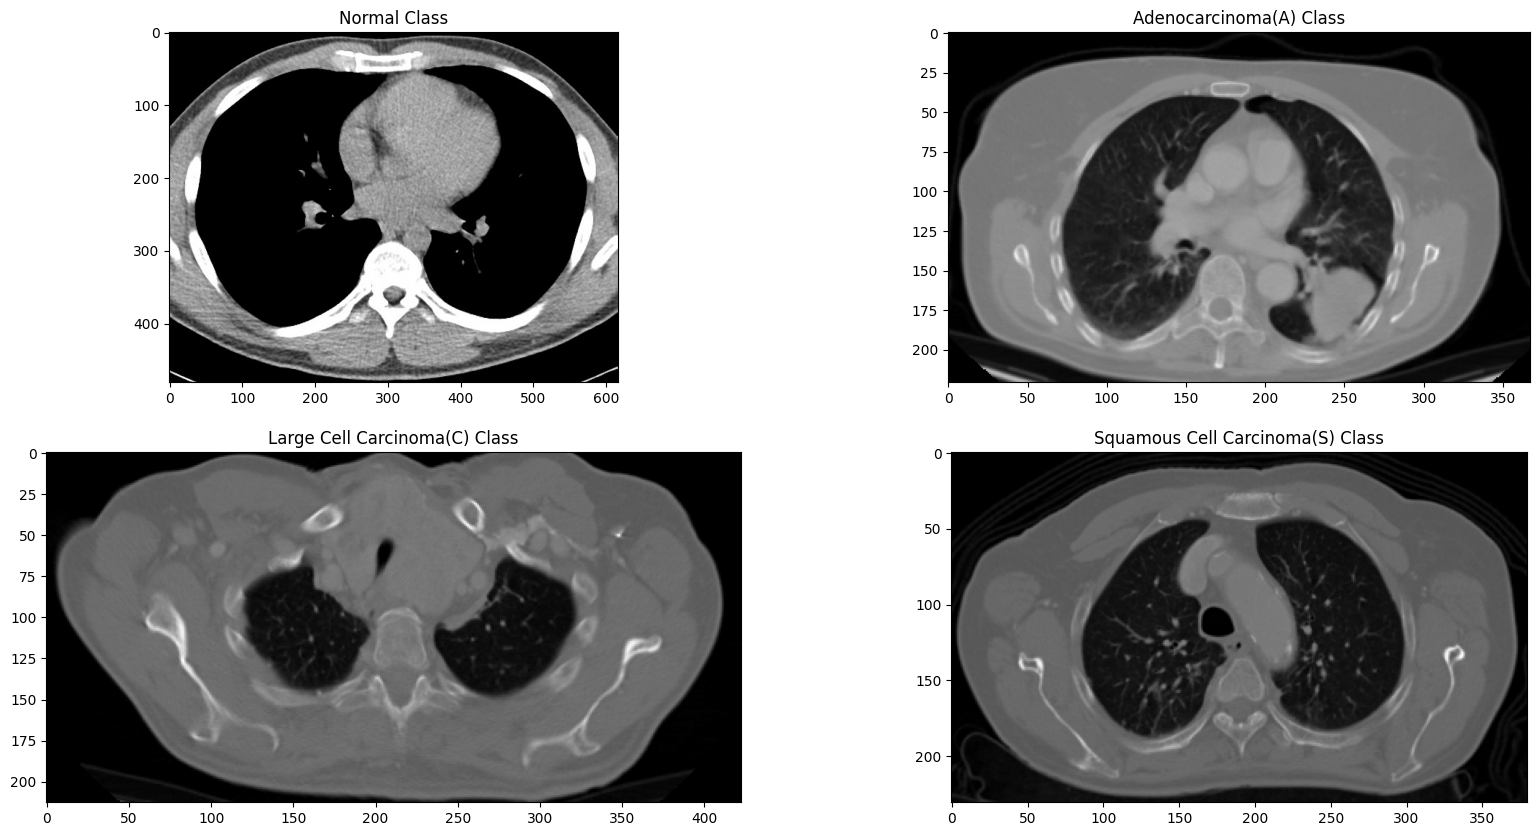

In [8]:
n_path = 'Data/train/normal/4.png'
a_path = 'Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000061.png'
l_path = 'Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000002.png'
s_path = 'Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000003.png'

img_n = plt.imread(n_path)
print('img_n.shape is ',img_n.shape)
img_a = plt.imread(a_path)
print('img_a.shape is ',img_a.shape)
img_l = plt.imread(l_path)
print('img_l.shape is ',img_l.shape)
img_s = plt.imread(s_path)
print('img_l.shape is ',img_l.shape)

# visualize the points
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax[0,0].imshow(img_n,cmap='gray', vmin=0, vmax=255)
ax[0,0].title.set_text('Normal Class')
ax[0,1].imshow(img_a, cmap='gray', vmin=0, vmax=255)
ax[0,1].title.set_text('Adenocarcinoma(A) Class')
ax[1,0].imshow(img_l, cmap='gray', vmin=0, vmax=255)
ax[1,0].title.set_text('Large Cell Carcinoma(C) Class')
ax[1,1].imshow(img_s, cmap='gray', vmin=0, vmax=255)
ax[1,1].title.set_text('Squamous Cell Carcinoma(S) Class')


plt.show()

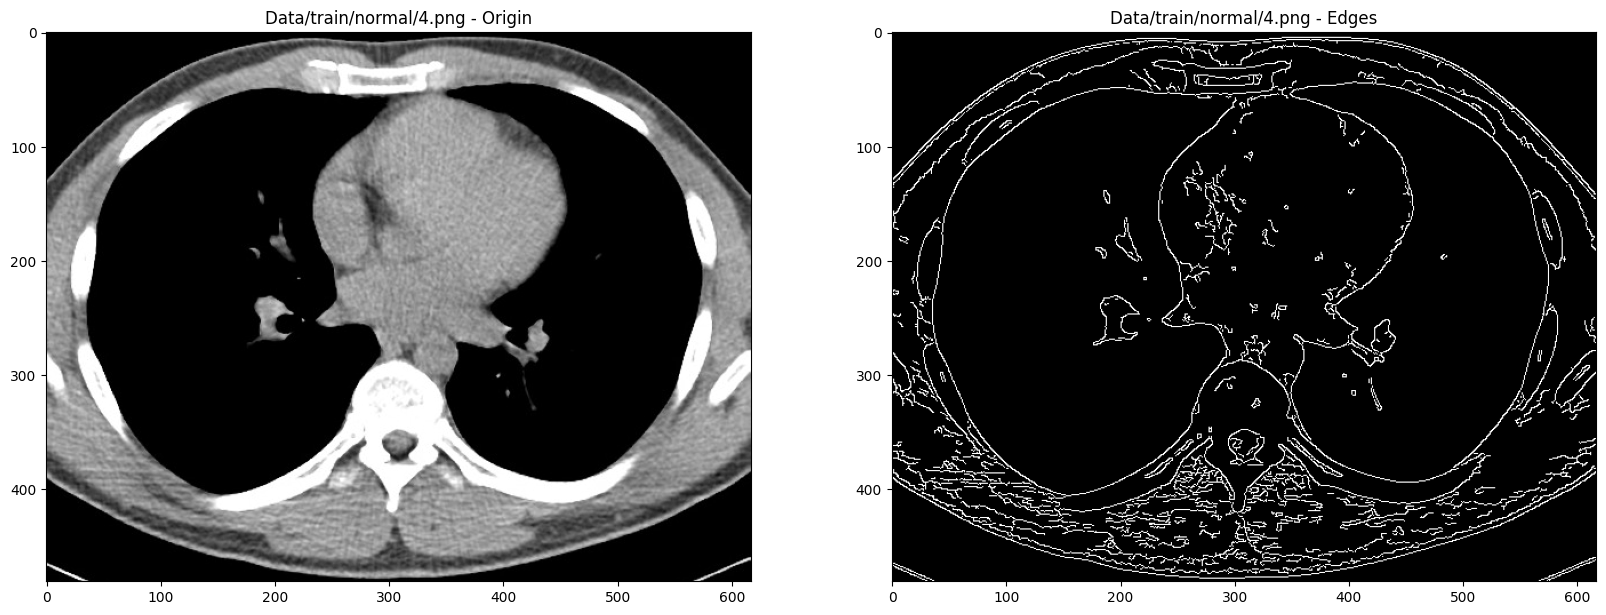

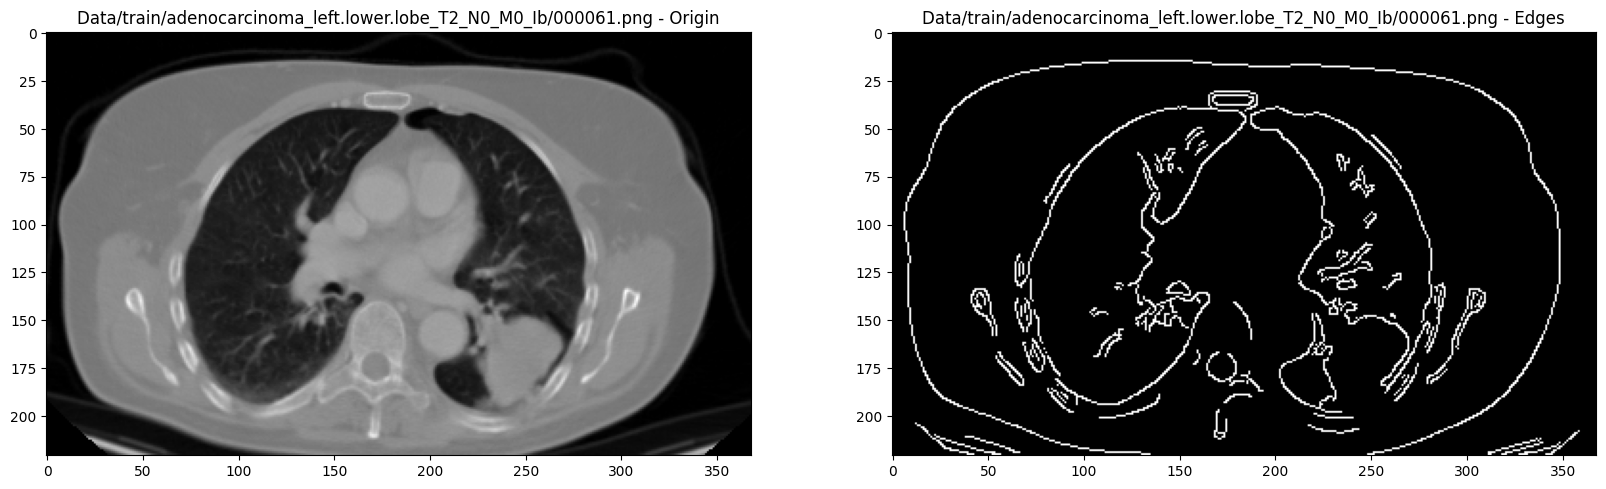

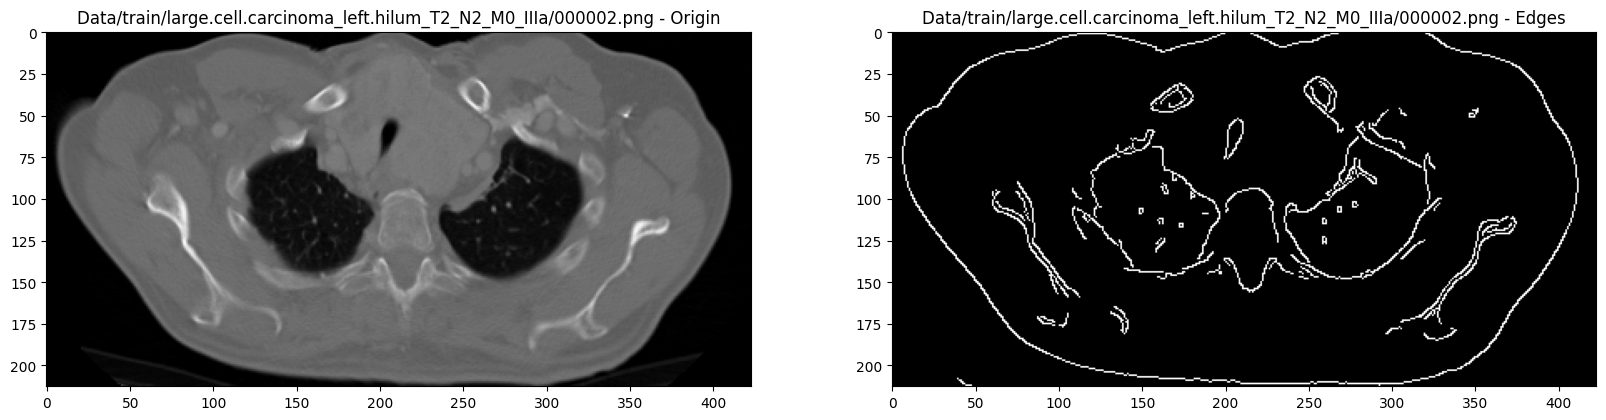

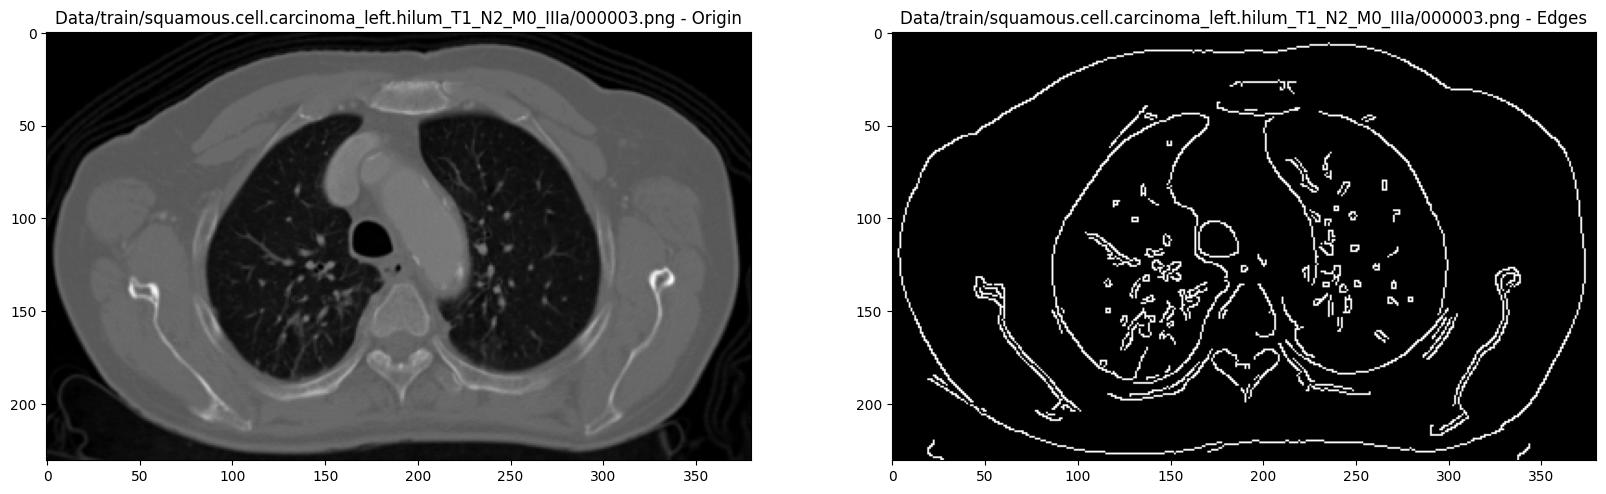

In [6]:
def apply_canny(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Canny edge detection
    edges = cv2.Canny(image, 100, 200)  # Adjust the threshold values as per your requirements

    # Display the original and processed images
#     cv2.imshow("Original", image)
#     cv2.imshow("Edges", edges)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
    ax[0].imshow(image,cmap='gray', vmin=0, vmax=255)
    # ax[0].title.set_text('Origin')
    ax[0].title.set_text(image_path + ' - Origin')
    ax[1].imshow(edges, cmap='gray', vmin=0, vmax=255)
    ax[1].title.set_text(image_path + ' - Edges')
    

# Apply Canny filter to each image

apply_canny(n_path)
apply_canny(a_path)
apply_canny(l_path)
apply_canny(s_path)






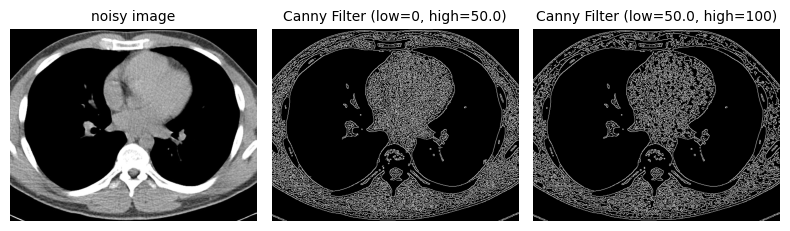

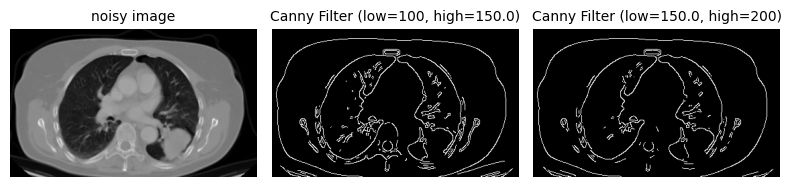

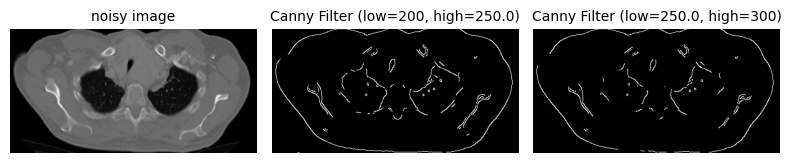

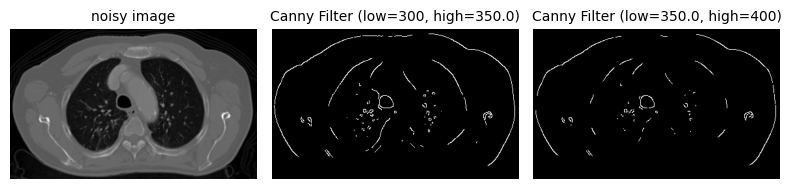

In [45]:
def canny_different_scale(image_path, lower_bound, upper_bound):
    
    # Load the image
    im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     im = plt.imread(image_path).astype(np.uint8)
#     im = cv2.cvtColor(im, cv2.IMREAD_GRAYSCALE)
    
    
    edges1 = cv2.Canny(im, lower_bound, (lower_bound+upper_bound)*.5)
    edges2 = cv2.Canny(im, (lower_bound+upper_bound)*.5, upper_bound)
    
    # display results
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

    ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
    ax[0].set_title('noisy image', fontsize=10)

    ax[1].imshow(edges1, cmap='gray', vmin=0, vmax=255)
    title = 'Canny Filter (low=' + str(lower_bound) + ', high=' + str((lower_bound+upper_bound)*.5) + ")"
    ax[1].set_title(title, fontsize=10)


    ax[2].imshow(edges2, cmap='gray', vmin=0, vmax=255)
    title = 'Canny Filter (low=' + str((lower_bound+upper_bound)*.5) + ', high=' + str(upper_bound) + ")"
    ax[2].set_title(title, fontsize=10)

    for a in ax:
        a.axis('off')

    fig.tight_layout()
    plt.show()

    
canny_different_scale(n_path, 0, 100)
canny_different_scale(a_path, 100, 200)
canny_different_scale(l_path, 200, 300)
canny_different_scale(s_path, 300, 400)

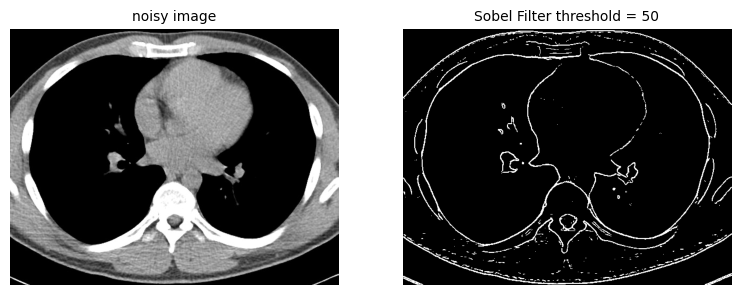

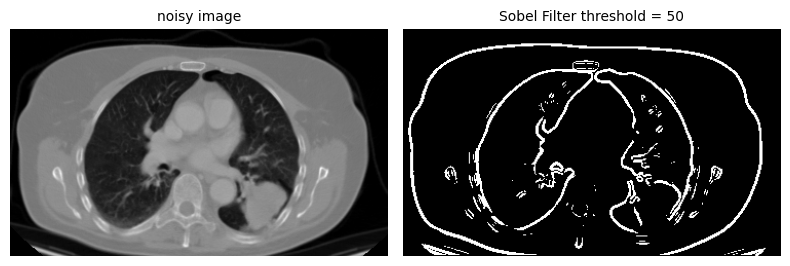

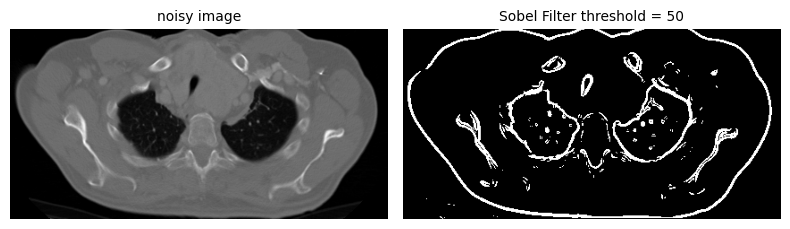

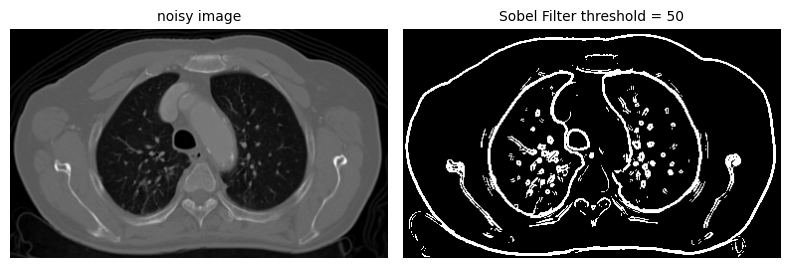

In [66]:
def detect_edges_sobel(image_path, threshold=100):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply the Sobel operator to detect edges in the horizontal direction
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_x = np.abs(sobel_x)
    
    # Apply the Sobel operator to detect edges in the vertical direction
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_y = np.abs(sobel_y)
    
    # Combine the horizontal and vertical edges
    edges = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
    
    # Normalize the edges to 0-255 range
    edges = np.uint8(edges / np.max(edges) * 255)
    
    # Threshold the edges to get a binary edge map
    edges[edges < threshold] = 0
    edges[edges >= threshold] = 255

    
    # display results
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

    ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
    ax[0].set_title('noisy image', fontsize=10)

    ax[1].imshow(edges, cmap='gray', vmin=0, vmax=255)
    title = 'Sobel Filter threshold = ' + str(threshold)
    ax[1].set_title(title, fontsize=10)

    for a in ax:
        a.axis('off')

    fig.tight_layout()
    plt.show()


# Example usage:
detect_edges_sobel(n_path, threshold=50)
detect_edges_sobel(a_path, threshold=50)
detect_edges_sobel(l_path, threshold=50)
detect_edges_sobel(s_path, threshold=50)


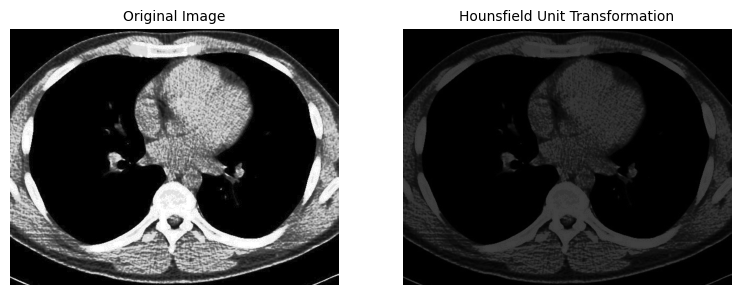

In [95]:
def apply_hounsfield_units(image_path, bone_hu=400, fat_hu=-120, water_hu = 0, air_hu=-1000):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)    
    image = cv2.equalizeHist(image)
    # Adjusting Hounsfield Units for the CT scan image
#     ct_image = (image - bone_hu) / (bone_hu - fat_hu) * 255
    ct_image = (image - water_hu) / (water_hu - air_hu) * 255
    
#     ct_image = 
    ct_image = ct_image = np.clip(ct_image, 0, 255).astype(np.uint8)
    
    # display results
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

    ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
    ax[0].set_title('Original Image', fontsize=10)

    ax[1].imshow(ct_image, cmap='gray', vmin=0, vmax=255)
    title = 'Hounsfield Unit Transformation'
    ax[1].set_title(title, fontsize=10)

    for a in ax:
        a.axis('off')

    fig.tight_layout()
    plt.show()


# Example usage:
# Assuming you have loaded your CT scan image as 'ct_image' using a suitable method (e.g., cv2.imread())
# Replace 'air_hu' and 'water_hu' with the corresponding Hounsfield Unit values for air and water in your CT machine

bone_hu = 400  # Hounsfield Unit for air
fat_hu = -120    # Hounsfield Unit for water

# Applying Hounsfield Units to the CT scan image
apply_hounsfield_units(n_path)
